In [1]:
# Import necessary libraries
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from kedro.io import DataCatalog
from datetime import datetime

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
%reload_ext kedro.ipython

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=37324;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=974465;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=559760;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=346738;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=971113;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=213639;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#171\171]8;;\
                             /Users/ishwarpawar/Desktop/Assesment/ETL/healthcare-etl-v4.                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[07/22/24 01:49:04] INFO     Kedro project healthcare-etl-v4                                        ]8;id=637198;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=640343;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=122519;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=807542;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=774807;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=565774;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [4]:
pipelines


{'__default__': Pipeline([
Node(clean_conditions_data, 'conditions', 'cleaned_conditions@csv', 'clean_conditions_data_node'),
Node(clean_encounters_data, 'encounters', 'cleaned_encounters', 'clean_encounters_data_node'),
Node(clean_medications_data, 'medications', 'cleaned_medications@csv', 'clean_medications_data_node'),
Node(clean_symptoms_data, 'symptoms', 'cleaned_symptoms', 'clean_symptoms_data_node'),
Node(clean_patients_gender_data, 'patient_gender', 'cleaned_patients_gender', 'cleaned_patients_gender_data_node'),
Node(clean_patients_data, 'patients', 'cleaned_patients', 'cleaned_patients_node'),
Node(extract_and_transform_symptoms, 'cleaned_symptoms', 'transformed_symptoms@csv', 'extract_and_transform_symptoms_node'),
Node(merge_data, {'pd_database_1': 'cleaned_patients', 'pd_database_2': 'cleaned_patients_gender', 'primary_key': 'params:primary_key'}, 'joined_patients@csv', 'join_patients_and_gender_node'),
Node(join_datasets_spark, {'transformed_symptoms': 'transformed_sympt

In [3]:
catalog.list()


[
    'healthcare_master',
    'transformed_symptoms@csv',
    'transformed_symptoms@spark',
    'joined_patients@csv',
    'joined_patients@spark',
    'medications',
    'cleaned_medications@csv',
    'cleaned_medications@spark',
    'symptoms',
    'cleaned_symptoms',
    'patients',
    'cleaned_patients',
    'patient_gender',
    'cleaned_patients_gender',
    'conditions',
    'cleaned_conditions@csv',
    'cleaned_conditions@spark',
    'encounters',
    'cleaned_encounters',
    'cleaned_patients_parquet',
    'parameters',
    'params:primary_key',
    'params:great_expectations_context_path'
]

In [4]:
joined_patients@csv = catalog.load("joined_patients@csv") 

                    INFO     Loading data from healthcare_master (SparkDataset)...              ]8;id=98223;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=882225;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [15]:
clean_conditions_data = catalog.load("patients") 

[07/22/24 15:51:37] INFO     Loading data from patients (CSVDataset)...                         ]8;id=493377;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=512584;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [20]:
joined_patients = catalog.load("joined_patients@spark")
print(joined_patients.count())
print("conditions data loaded..")
cleaned_encounters = catalog.load("cleaned_encounters")
master_spark_df_p = joined_patients.join(cleaned_encounters, on='patient_id', how='inner')
print("Inner-",master_spark_df.count()) 

[07/22/24 15:57:54] INFO     Loading data from joined_patients@spark (SparkDataset)...          ]8;id=826790;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=958515;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

9710
conditions data loaded..


                    INFO     Loading data from cleaned_encounters (SparkDataset)...             ]8;id=186359;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=785124;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

Inner- 4149


In [27]:
# Load datasets
# joined_patients_df = catalog.load("joined_patients@csv") 
# cleaned_medications_df = catalog.load("cleaned_medications@csv")
# cleaned_encounters_df = catalog.load("cleaned_encounters")
# cleaned_conditions_df = catalog.load("cleaned_conditions@csv")
cleaned_conditions_df = catalog.load("cleaned_conditions@spark")
print("conditions data loaded..")
cleaned_encounters = catalog.load("cleaned_medications@spark")
# Rename columns to a consistent format (if needed)
print(cleaned_encounters)
cleaned_conditions_df= cleaned_conditions_df.withColumnRenamed("encounter_id_fkm","encounter_id")
master_spark_df = cleaned_conditions_df.join(cleaned_encounters, on='encounter_id', how='inner')
print("Inner-",master_spark_df.count()) 


master_spark_df_mm = master_spark_df_p.join(master_spark_df, on='patient_id', how='inner')
print("Inner-",master_spark_df_mm.count()) 

[07/22/24 16:01:13] INFO     Loading data from cleaned_conditions@spark (SparkDataset)...       ]8;id=972284;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=927231;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

conditions data loaded..


                    INFO     Loading data from cleaned_medications@spark (SparkDataset)...      ]8;id=18790;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=309251;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

DataFrame[prescribing_date: timestamp, dispensing_date: timestamp, patient_id: string, payer_id: string, encounter_id_fkm: string, medication_code: int, medication_description: string, base_cost: double, payer_coverage: double, dispenses: int, total_cost: double, reason_code: double, reason_description: string]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:12                                                                                   │
│                                                                                                  │
│    9 # Rename columns to a consistent format (if needed)                                         │
│   10 print(cleaned_encounters)                                                                   │
│   11 cleaned_conditions_df= cleaned_conditions_df.withColumnRenamed("encounter_id_fkm","encou    │
│ ❱ 12 master_spark_df = cleaned_conditions_df.join(cleaned_encounters, on='encounter_id', how=    │
│   13 print("Inner-",master_spark_df.count())                                                     │
│   14                                                                                             │
│   15                                                                                             │
│                                                                                                  │
│ /opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/pyspark/sql/dataframe.py:2491  │
│ in join                                                                                          │
│                                                                                                  │
│   2488 │   │   │   if on is None:                                                                │
│   2489 │   │   │   │   on = self._jseq([])                                                       │
│   2490 │   │   │   assert isinstance(how, str), "how should be a string"                         │
│ ❱ 2491 │   │   │   jdf = self._jdf.join(other._jdf, on, how)                                     │
│   2492 │   │   return DataFrame(jdf, self.sparkSession)                                          │
│   2493 │                                                                                         │
│   2494 │   # TODO(SPARK-22947): Fix the DataFrame API.                                           │
│                                                                                                  │
│ /opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/py4j/java_gateway.py:1322 in   │
│ __call__                                                                                         │
│                                                                                                  │
│   1319 │   │   │   proto.END_COMMAND_PART                                                        │
│   1320 │   │                                                                                     │
│   1321 │   │   answer = self.gateway_client.send_command(command)                                │
│ ❱ 1322 │   │   return_value = get_return_value(                                                  │
│   1323 │   │   │   answer, self.gateway_client, self.target_id, self.name)                       │
│   1324 │   │                                                                                     │
│   1325 │   │   for temp_arg in temp_args:                                                        │
│                                                                                                  │
│ /opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/pyspark/errors/exceptions/capt │
│ ured.py:185 in deco                                                                              │
│                                                                                                  │
│   182 │   │   │   if not isinstance(converted, UnknownException):                                │
│   183 │   │   │   │   # Hide where the exception came from that shows a non-Pythonic             │
│   184 │   │   │   │   # JVM exception message.                                                   │
│ ❱ 185 │   │   │   │   raise converted from None            

In [13]:
# Load datasets
patients_df = catalog.load("patients")
medications_df = catalog.load("medications")
symptoms_df = catalog.load("symptoms")
conditions_df = catalog.load("conditions")
encounters_df = catalog.load("encounters")
patient_gender_df = catalog.load("patient_gender")
cleaned_symptoms_df = catalog.load("cleaned_symptoms")
healthcare_master_df = catalog.load("healthcare_master")

[07/20/24 14:21:52] INFO     Loading data from patients (CSVDataset)...                         ]8;id=684099;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=708506;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from medications (CSVDataset)...                      ]8;id=123785;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=60153;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from symptoms (CSVDataset)...                         ]8;id=396902;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=576863;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from conditions (ExcelDataset)...                     ]8;id=629441;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=952023;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

[07/20/24 14:21:53] INFO     Loading data from encounters (SparkDataset)...                     ]8;id=92973;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=636015;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from patient_gender (CSVDataset)...                   ]8;id=449865;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=646614;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from cleaned_symptoms (CSVDataset)...                 ]8;id=857277;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=7748;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from healthcare_master (SparkDataset)...              ]8;id=114148;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=904356;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [14]:
healthcare_master_df.show(40)
healthcare_master_df.printSchema()

+----------+----------+----------------------+--------------+--------+------+----------+---------+------+-----------+--------------+----+---------+----------+-------+----+-----+------+----+--------+--------+---------+-------------------+-------------------+------+---+------+---------+------------+-------------+-------------------+----------------+--------------+-------------+-------------+------------+-----------+------------------+----------------+---------------+--------+---------------+---------------+----------------------+---------+--------------+---------+----------+-----------+------------------+
|patient_id|birth_date|social_security_number|driversLicense|passport|prefix|first_name|last_name|suffix|maiden_name|marital_status|race|ethnicity|birthPlace|address|city|state|county|Fips|zip_code|latitude|longitude|healthcare_expenses|healthcare_coverage|income|age|GENDER|pathology|num_symptoms|Rash_symptoms|joint_pain_symptoms|fatigue_symptoms|fever_symptoms|recorded_date|resolved_da

In [55]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PATIENT_ID           10000 non-null  object 
 1   BIRTHDATE            10000 non-null  object 
 2   DEATHDATE            0 non-null      float64
 3   SSN                  10000 non-null  object 
 4   DRIVERS              7680 non-null   object 
 5   PASSPORT             7039 non-null   object 
 6   PREFIX               7337 non-null   object 
 7   FIRST                10000 non-null  object 
 8   LAST                 10000 non-null  object 
 9   SUFFIX               59 non-null     object 
 10  MAIDEN               2352 non-null   object 
 11  MARITAL              5854 non-null   object 
 12  RACE                 10000 non-null  object 
 13  ETHNICITY            10000 non-null  object 
 14  GENDER               0 non-null      float64
 15  BIRTHPLACE           10000 non-null  

In [7]:
# Display basic information and first few rows of each dataset
datasets = {
    "Patients": patients_df,
    "Medications": medications_df,
    "Symptoms": symptoms_df,
    "Conditions": conditions_df,
    "Encounters": encounters_df,
    "patient_gender": patient_gender_df
}

In [8]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    if isinstance(df, pd.DataFrame):
        print(df.info())
        print(df.head())
    else:
        df.printSchema()
        df.show(5)

Dataset: Patients
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PATIENT_ID           10000 non-null  object 
 1   BIRTHDATE            10000 non-null  object 
 2   DEATHDATE            0 non-null      float64
 3   SSN                  10000 non-null  object 
 4   DRIVERS              7680 non-null   object 
 5   PASSPORT             7039 non-null   object 
 6   PREFIX               7337 non-null   object 
 7   FIRST                10000 non-null  object 
 8   LAST                 10000 non-null  object 
 9   SUFFIX               59 non-null     object 
 10  MAIDEN               2352 non-null   object 
 11  MARITAL              5854 non-null   object 
 12  RACE                 10000 non-null  object 
 13  ETHNICITY            10000 non-null  object 
 14  GENDER               0 non-null      float64
 15  BIRTHPLACE         

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|                  Id|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|         DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|6539c675-dcf2-cac...|2014-02-10T11:00:08Z|2014-02-10T11:15:08Z|54F1059E-6250-394...|ef42ec52-a1c1-3fc...|35088bec-f756-35d...|8fa6c185-e44e-3e3...|      wellness|410620009

                             patient_id  gender
0  54f1059e-6250-3949-6dd0-1dda9b85d22a  Female
1  92675303-ca5b-136a-169b-e764c5753f06    Male
2  a0b63e97-b6fd-5fe1-8f2d-2bec915efa97    Male
3  abc59f62-dc5a-5095-1141-80b4ee8be73b  Female
4  28d7b56c-6056-d0a2-2991-39d6e917216c  Female
                                  patient_id  gender
count                                  10000   10000
unique                                 10000       2
top     8d116ace-7fb6-7d5f-b86b-94547cbd796d  Female
freq                                       1    5090
patient_id    0
gender        0
dtype: int64
patient_id    object
gender        object
dtype: object
                             patient_id  gender
0  54f1059e-6250-3949-6dd0-1dda9b85d22a  Female
1  92675303-ca5b-136a-169b-e764c5753f06    Male
2  a0b63e97-b6fd-5fe1-8f2d-2bec915efa97    Male
3  abc59f62-dc5a-5095-1141-80b4ee8be73b  Female
4  28d7b56c-6056-d0a2-2991-39d6e917216c  Female


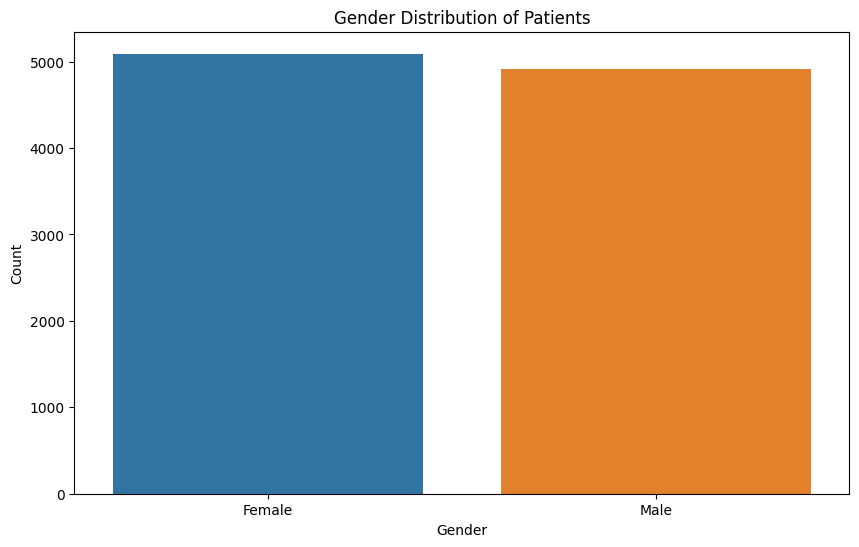

In [54]:
# Patient Gender DF
# Display the first few rows of the dataset to understand its structure
print(patient_gender_df.head())

# Display basic statistics to identify outliers
print(patient_gender_df.describe())

# Check for any null values
print(patient_gender_df.isnull().sum())

# Check the data types of each column
print(patient_gender_df.dtypes)

# Rename columns to a consistent format (if needed)
patient_gender_df.rename(columns={
    'PatientID': 'patient_id',
    'Gender': 'gender'
}, inplace=True)

# Standardize the gender field: Capitalize each word and handle 'Unknown' gender
patient_gender_df['gender'] = patient_gender_df['gender'].str.title()
patient_gender_df['gender'] = patient_gender_df['gender'].replace({'M': 'Male', 'F': 'Female', 'U': 'Unknown'})

# Handle missing values (if any)
patient_gender_df.fillna({'gender': 'Unknown'}, inplace=True)

# Display the cleaned data
print(patient_gender_df.head())

# Visualize the gender distribution to identify outliers
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=patient_gender_df)
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
## Findings:
- **Birth Date:** Some missing values (150), with dates ranging from 1913 to 2024.
- **Death Date:** All values missing (10000).
- **Gender (GENDER):** All values missing. Process in next stage
- **Prefix and Suffix:** Inconsistent and many missing values (2663 and 9941 respectively).
- **Age:** Some outliers detected and corrected, ranging from 0 to 111 years.
- **Healthcare Expenses:** Some outliers corrected using IQR method.
- **Income:** Includes negative values (-986794), which may need further investigation.
- **Missing Data:** Significant missing data in death date, gender, prefix, suffix, maiden name, marital status.

### Assumptions:
- Birth Date is critical for analysis, so records with missing Birth Date are removed.
- Income should be a positive value, so negative income values are filtered out.
- Prefix and Suffix are standardized to title case and uppercase respectively.
- Age outliers are corrected based on reasonable assumptions about human lifespan.
- Healthcare Expenses outliers are adjusted using the IQR method to maintain data integrity.

In [24]:
import numpy as np
# Rename columns to match Tuva Data Model Input Layer
patients_df.rename(columns={
    'PATIENT_ID': 'patient_id',
    'BIRTHDATE': 'birth_date',
    'DEATHDATE': 'death_date',
    'SSN': 'social_security_number',
    'DRIVERS': 'driversLicense',
    'PASSPORT': 'passport',
    'PREFIX': 'prefix',
    'FIRST': 'first_name',
    'LAST': 'last_name',
    'SUFFIX': 'suffix',
    'MAIDEN': 'maiden_name',
    'MARITAL': 'marital_status',
    'RACE': 'Race',
    'ETHNICITY': 'ethnicity',
    'BIRTHPLACE': 'birthPlace',
    'ADDRESS': 'address',
    'CITY': 'city',
    'STATE': 'state',
    'COUNTY': 'county',
    'FIPS': 'Fips',
    'ZIP': 'zip_code',
    'LAT': 'latitude',
    'LON': 'longitude',
    'HEALTHCARE_EXPENSES': 'healthcare_expenses',
    'HEALTHCARE_COVERAGE': 'healthcare_coverage',
    'INCOME': 'income'
}, inplace=True)

# Convert 'BIRTHDATE' to datetime format
patients_df['birth_date'] = pd.to_datetime(patients_df['birth_date'], errors='coerce')
patients_df['age'] = (datetime.now() - patients_df['birth_date']).dt.days // 365

# Remove records with missing Birth Date
patients_df = patients_df.dropna(subset=['birth_date'])

# Remove negative values from Income
patients_df = patients_df[patients_df['income'] > 0]

# Standardize prefix and suffix
patients_df['prefix'] = patients_df['prefix'].str.strip().str.title()
patients_df['suffix'] = patients_df['suffix'].str.strip().str.upper()

# Handle age outliers
mean_age = patients_df['age'].mean()
patients_df['age'] = np.where((patients_df['age'] < 0) | (patients_df['age'] > 120), mean_age, patients_df['age'])

# Handle healthcare_expenses outliers
Q1 = patients_df['healthcare_expenses'].quantile(0.25)
Q3 = patients_df['healthcare_expenses'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
patients_df['healthcare_expenses'] = np.where((patients_df['healthcare_expenses'] < lower_bound) | (patients_df['healthcare_expenses'] > upper_bound), np.nan, patients_df['healthcare_expenses'])

# # Save cleaned dataset
# patients_df.to_csv('cleaned_patients.csv', index=False)

# Display first few rows to verify
print(patients_df.head())

# # Calculate age based on 'BIRTHDATE' and current date
# patients_df['age'] = (datetime.now() - patients_df['birth_date']).astype('<m8[Y]').astype(int)

                             patient_id birth_date  death_date  \
0  54f1059e-6250-3949-6dd0-1dda9b85d22a 2002-01-21         NaN   
1  92675303-ca5b-136a-169b-e764c5753f06 1997-04-16         NaN   
2  a0b63e97-b6fd-5fe1-8f2d-2bec915efa97 1993-02-04         NaN   
3  abc59f62-dc5a-5095-1141-80b4ee8be73b 1995-05-23         NaN   
4  28d7b56c-6056-d0a2-2991-39d6e917216c 1993-11-13         NaN   

  social_security_number driversLicense    passport prefix    first_name  \
0            999-28-3364      S99987398  X44428214X    Ms.  Fredricka415   
1            999-62-9859      S99999770  X75016560X    Mr.    Lorenzo669   
2            999-53-6488      S99979170  X60079936X    Mr.     Luther918   
3            999-37-1058      S99981031  X14759314X   Mrs.     Jacque955   
4            999-31-6091      S99958903  X63033472X   Mrs.     Angela104   

     last_name suffix  ...  state           county     Fips zip_code  \
0     Crist667    NaN  ...  Texas   Tarrant County  48439.0    76104   
1 

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:64                                                                                   │
│                                                                                                  │
│   61 # Display first few rows to verify                                                          │
│   62 print(patients_df.head())                                                                   │
│   63                                                                                             │
│ ❱ 64 print(patients_df.summary())                                                                │
│   65 # # Calculate age based on 'BIRTHDATE' and current date                                     │
│   66 # patients_df['age'] = (datetime.now() - patients_df['birth_date']).astype('<m8[Y]').ast    │
│   67                                                                                             │
│                                                                                                  │
│ /opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/pandas/core/generic.py:6299   │
│ in __getattr__                                                                                   │
│                                                                                                  │
│    6296 │   │   │   and self._info_axis._can_hold_identifiers_and_holds_name(name)               │
│    6297 │   │   ):                                                                               │
│    6298 │   │   │   return self[name]                                                            │
│ ❱  6299 │   │   return object.__getattribute__(self, name)                                       │
│    6300 │                                                                                        │
│    6301 │   @final                                                                               │
│    6302 │   def __setattr__(self, name: str, value) -> None:                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'DataFrame' object has no attribute 'summary'

In [22]:
# Summary statistics
summary_stats = patients_df.describe()

# Count of missing values by column
missing_values = patients_df.isnull().sum()

# Unique values count for categorical columns
unique_values = patients_df.nunique()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)

print("\nUnique Values:")
print(unique_values)


Summary Statistics:
                          birth_date  death_date  GENDER          Fips  \
count                           9850         0.0     0.0   9710.000000   
mean   1988-03-25 14:32:19.979695424         NaN     NaN  48188.824717   
min              1913-05-15 00:00:00         NaN     NaN  35013.000000   
25%              1971-01-12 00:00:00         NaN     NaN  48113.000000   
50%              1990-05-10 12:00:00         NaN     NaN  48201.000000   
75%              2007-01-31 00:00:00         NaN     NaN  48355.000000   
max              2024-01-22 00:00:00         NaN     NaN  48507.000000   
std                              NaN         NaN     NaN    690.565166   

           zip_code      latitude     longitude  healthcare_expenses  \
count  10000.000000  10000.000000  10000.000000         10000.000000   
mean   74947.406200      0.309868    -97.548956         10489.406391   
min        0.000000      0.258876   -106.646755           100.000000   
25%    75904.000000      

In [27]:
import pandas as pd

# Assuming 'medications_df' is your DataFrame containing the Medications dataset

# Rename columns
medications_df.rename(columns={
    'START': 'start_date',
    'STOP': 'stop_date',
    'PATIENT': 'patient_id',
    'PAYER': 'payer_id',
    'ENCOUNTER': 'encounter_id',
    'CODE': 'code',
    'DESCRIPTION': 'description',
    'BASE_COST': 'base_cost',
    'PAYER_COVERAGE': 'payer_coverage',
    'DISPENSES': 'dispenses',
    'TOTALCOST': 'total_cost',
    'REASONCODE': 'reason_code',
    'REASONDESCRIPTION': 'reason_description'
}, inplace=True)

# Convert 'start_date' and 'stop_date' to datetime format
medications_df['start_date'] = pd.to_datetime(medications_df['start_date'], errors='coerce')
medications_df['stop_date'] = pd.to_datetime(medications_df['stop_date'], errors='coerce')

# Display the cleaned dataset
print("Cleaned Medications Dataset:")
print(medications_df.head())


Cleaned Medications Dataset:
                 start_date                 stop_date  \
0 2020-04-22 02:47:09+00:00                       NaT   
1 2020-04-22 02:47:09+00:00 2020-05-17 02:47:09+00:00   
2 2021-08-01 02:47:09+00:00 2021-08-15 02:47:09+00:00   
3 2021-08-01 02:47:09+00:00 2021-08-15 02:47:09+00:00   
4 2023-05-18 02:47:09+00:00 2023-06-14 02:47:09+00:00   

                             patient_id                              payer_id  \
0  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
1  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
2  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
3  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
4  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   

                           encounter_id    code  \
0  402DFAEB-1888-F562-4651-F75203EB1E28  849574   
1  402DFAEB-1888-F562-4651-F75203EB1E28

In [26]:

# Assuming 'medications_df' is your DataFrame containing the Medications dataset

# Display the first few rows of the dataset to understand its structure
print(medications_df.head())

# Display basic statistics to identify outliers
print(medications_df.describe())

# Check for any null values
print(medications_df.isnull().sum())

# Check the data types of each column
print(medications_df.dtypes)

                  START                  STOP  \
0  2020-04-22T02:47:09Z                   NaN   
1  2020-04-22T02:47:09Z  2020-05-17T02:47:09Z   
2  2021-08-01T02:47:09Z  2021-08-15T02:47:09Z   
3  2021-08-01T02:47:09Z  2021-08-15T02:47:09Z   
4  2023-05-18T02:47:09Z  2023-06-14T02:47:09Z   

                                PATIENT                                 PAYER  \
0  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
1  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
2  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
3  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
4  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   

                              ENCOUNTER    CODE  \
0  402DFAEB-1888-F562-4651-F75203EB1E28  849574   
1  402DFAEB-1888-F562-4651-F75203EB1E28  312615   
2  FBC2F3B3-AB93-707E-AD9E-337990345F32  241834   
3  FBC2F3B3-AB

In [9]:
print(symptoms_df.head())

# Display basic statistics to identify outliers
print(symptoms_df.describe())

# Check for any null values
print(symptoms_df.isnull().sum())

# Check the data types of each column
print(symptoms_df.dtypes)

                                PATIENT  GENDER   RACE    ETHNICITY  \
0  28d7b56c-6056-d0a2-2991-39d6e917216c     NaN  white     hispanic   
1  6c434506-fb4b-3e3f-c19d-553dec3b6c17     NaN  black     hispanic   
2  44a8ca45-6c6e-38bb-fac0-ddbf7a7ee3a4     NaN  white  nonhispanic   
3  780ec78c-22a0-fcdb-17c6-ae9b2fcace9c     NaN  white     hispanic   
4  cf5956bb-34f2-841b-2505-57b99991c377     NaN  white  nonhispanic   

   AGE_BEGIN  AGE_END            PATHOLOGY  NUM_SYMPTOMS  \
0         26      NaN  Lupus erythematosus             4   
1         58      NaN  Lupus erythematosus             4   
2         50      NaN  Lupus erythematosus             4   
3         39      NaN  Lupus erythematosus             4   
4         29      NaN  Lupus erythematosus             3   

                                    SYMPTOMS  
0   Rash:34;Joint Pain:39;Fatigue:9;Fever:12  
1  Rash:19;Joint Pain:44;Fatigue:48;Fever:15  
2    Rash:2;Joint Pain:32;Fatigue:12;Fever:6  
3  Rash:30;Joint Pain:30

### Step 2: Handling Data Quality Issues

Based on the initial exploration:

#### Missing Values:
- 'gender' and 'age_end' columns are entirely null. Depending on your analysis, you may decide to drop these columns if they are not relevant or impute values if necessary.

#### Column Types:
- Ensure numeric columns (`age_begin`, `age_end`, `num_symptoms`) are correctly represented as integers where applicable.

#### Assumptions:
- The absence of values in 'gender' and 'age_end' columns may imply missing or unavailable data. Dropping these columns could be considered if they do not contribute to your analysis.
- Numeric columns should be converted to integers to ensure consistency and facilitate mathematical operations.

Pivot symptoms


In [31]:

# 'symptoms_df' Symptoms dataset

# Rename columns
symptoms_df.rename(columns={
    'PATIENT': 'patient_id',
    'GENDER': 'gender',
    'RACE': 'race',
    'ETHNICITY': 'ethnicity',
    'AGE_BEGIN': 'age_begin',
    'AGE_END': 'age_end',
    'PATHOLOGY': 'pathology',
    'NUM_SYMPTOMS': 'num_symptoms',
    'SYMPTOMS': 'symptoms'
}, inplace=True)

# Drop the 'gender' column if it exists
if 'gender' in symptoms_df.columns:
    symptoms_df.drop(columns=['gender'], inplace=True)

# Display the cleaned dataset
print("Cleaned Symptoms Dataset:")
print(symptoms_df.head())


Cleaned Symptoms Dataset:
                             patient_id   race    ethnicity  age_begin  \
0  28d7b56c-6056-d0a2-2991-39d6e917216c  white     hispanic         26   
1  6c434506-fb4b-3e3f-c19d-553dec3b6c17  black     hispanic         58   
2  44a8ca45-6c6e-38bb-fac0-ddbf7a7ee3a4  white  nonhispanic         50   
3  780ec78c-22a0-fcdb-17c6-ae9b2fcace9c  white     hispanic         39   
4  cf5956bb-34f2-841b-2505-57b99991c377  white  nonhispanic         29   

   age_end            pathology  num_symptoms  \
0      NaN  Lupus erythematosus             4   
1      NaN  Lupus erythematosus             4   
2      NaN  Lupus erythematosus             4   
3      NaN  Lupus erythematosus             4   
4      NaN  Lupus erythematosus             3   

                                    symptoms  
0   Rash:34;Joint Pain:39;Fatigue:9;Fever:12  
1  Rash:19;Joint Pain:44;Fatigue:48;Fever:15  
2    Rash:2;Joint Pain:32;Fatigue:12;Fever:6  
3  Rash:30;Joint Pain:30;Fatigue:41;Fever:19  

In [32]:
print(conditions_df.head())

# Display basic statistics to identify outliers
print(conditions_df.describe())

# Check for any null values
print(conditions_df.isnull().sum())

# Check the data types of each column
print(conditions_df.dtypes)


        START  STOP                               PATIENT  \
0  2020-04-21   NaN  28D7B56C-6056-D0A2-2991-39D6E917216C   
1  2001-11-07   NaN  239AE86A-96DB-6211-9042-D3F2850AABB8   
2  2001-11-07   NaN  239AE86A-96DB-6211-9042-D3F2850AABB8   
3  2017-11-05   NaN  6C434506-FB4B-3E3F-C19D-553DEC3B6C17   
4  1989-09-15   NaN  6872DEF5-772F-427C-3053-DE6E1C71CE0A   

                              ENCOUNTER       CODE          DESCRIPTION  
0  402dfaeb-1888-f562-4651-f75203eb1e28  200936003  Lupus erythematosus  
1  10d39d6f-7d98-8d03-8866-0a7cd363890b  200936003  Lupus erythematosus  
2  10d39d6f-7d98-8d03-8866-0a7cd363890b  271737000    Anemia (disorder)  
3  add4fa37-cabe-a5aa-f9da-8117464bad04  200936003  Lupus erythematosus  
4  d8a684cb-6ce1-5909-59e7-3422469d18d0  200936003  Lupus erythematosus  
       STOP          CODE
count   0.0  4.149000e+03
mean    NaN  2.242292e+08
std     NaN  3.326973e+07
min     NaN  2.009360e+08
25%     NaN  2.009360e+08
50%     NaN  2.009360e+08
75%    

In [ ]:
### Step 2: Handling Data Quality Issues

Based on the initial exploration:

#### Missing Values:
- 'stop' column has all null values (`NaN`). 

#### Assumptions:
- The absence of values in the 'stop' column may indicate missing or unavailable data. As all records contain null value considering to keep row.
- Rename column 

In [34]:
# conditions_df

# Rename columns if needed
conditions_df.rename(columns={
    'START': 'start_date',
    'STOP': 'stop_date',
    'PATIENT': 'patient_id',
    'ENCOUNTER': 'encounter_id',
    'CODE': 'condition_code',
    'DESCRIPTION': 'condition_description'
}, inplace=True)

# Print updated DataFrame information to verify changes
print(conditions_df.info())

# Optionally, save the cleaned DataFrame to a new file or overwrite the original
# conditions_df.to_excel('path_to_save_cleaned_conditions.xlsx', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   start_date             4149 non-null   object 
 1   stop_date              0 non-null      float64
 2   patient_id             4149 non-null   object 
 3   encounter_id           4149 non-null   object 
 4   condition_code         4149 non-null   int64  
 5   condition_description  4149 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 194.6+ KB
None


In [39]:
from pyspark.sql.functions import col, count, when, isnull, to_timestamp

# Display the first few rows
encounters_df.show()

# Display basic statistics to identify outliers
encounters_df.describe().show()

# Check for any null values
null_counts = encounters_df.select([count(when(isnull(c), c)).alias(c) for c in encounters_df.columns])
null_counts.show()

# Check the data types of each column
print(encounters_df.dtypes)

# Rename columns
encounters_df = encounters_df.withColumnRenamed("Id", "id") \
    .withColumnRenamed("START", "start") \
    .withColumnRenamed("STOP", "stop") \
    .withColumnRenamed("PATIENT", "patient_id") \
    .withColumnRenamed("ORGANIZATION", "organization") \
    .withColumnRenamed("PROVIDER", "provider") \
    .withColumnRenamed("PAYER", "payer") \
    .withColumnRenamed("ENCOUNTERCLASS", "encounter_class") \
    .withColumnRenamed("CODE", "code") \
    .withColumnRenamed("DESCRIPTION", "description") \
    .withColumnRenamed("BASE_ENCOUNTER_COST", "base_encounter_cost") \
    .withColumnRenamed("TOTAL_CLAIM_COST", "total_claim_cost") \
    .withColumnRenamed("PAYER_COVERAGE", "payer_coverage") \
    .withColumnRenamed("REASONCODE", "reason_code") \
    .withColumnRenamed("REASONDESCRIPTION", "reason_description")

# Convert date columns
encounters_df = encounters_df.withColumn("start", to_timestamp("start")) \
    .withColumn("stop", to_timestamp("stop"))

# Convert columns to appropriate data types
encounters_df = encounters_df.withColumn("base_encounter_cost", col("base_encounter_cost").cast("float")) \
    .withColumn("total_claim_cost", col("total_claim_cost").cast("float")) \
    .withColumn("payer_coverage", col("payer_coverage").cast("float"))

# Show the schema to verify changes
encounters_df.printSchema()


# # Save the cleaned DataFrame
# encounters_df.write.mode("overwrite").parquet("data/02_intermediate/cleaned_encounters.parquet")


+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+---------------+---------+--------------------+-------------------+----------------+--------------+
|                  id|              start|               stop|          patient_id|        organization|            provider|               payer|encounter_class|     code|         description|base_encounter_cost|total_claim_cost|payer_coverage|
+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+---------------+---------+--------------------+-------------------+----------------+--------------+
|6539c675-dcf2-cac...|2014-02-10 16:30:08|2014-02-10 16:45:08|54F1059E-6250-394...|ef42ec52-a1c1-3fc...|35088bec-f756-35d...|8fa6c185-e44e-3e3...|       wellness|410620009|Well child visit ...|             133.36|          405.36|           0.0|
|748a443c-9819-4

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+-------------------+------------------+------------------+
|summary|                  id|          patient_id|        organization|            provider|               payer|encounter_class|                code|         description|base_encounter_cost|  total_claim_cost|    payer_coverage|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+-------------------+------------------+------------------+
|  count|              104262|              104262|              104262|              104262|              104262|         104262|              104262|              104262|             104262|            104262|            104262|
|   mean|                NULL|                NULL|                NULL|    

In [39]:
from pyspark.sql.functions import col, count, when, isnull, to_timestamp

# Display the first few rows
encounters_df.show()

# Display basic statistics to identify outliers
encounters_df.describe().show()

# Check for any null values
null_counts = encounters_df.select([count(when(isnull(c), c)).alias(c) for c in encounters_df.columns])
null_counts.show()

# Check the data types of each column
print(encounters_df.dtypes)

# Rename columns
encounters_df = encounters_df.withColumnRenamed("Id", "id") \
    .withColumnRenamed("START", "start") \
    .withColumnRenamed("STOP", "stop") \
    .withColumnRenamed("PATIENT", "patient_id") \
    .withColumnRenamed("ORGANIZATION", "organization") \
    .withColumnRenamed("PROVIDER", "provider") \
    .withColumnRenamed("PAYER", "payer") \
    .withColumnRenamed("ENCOUNTERCLASS", "encounter_class") \
    .withColumnRenamed("CODE", "code") \
    .withColumnRenamed("DESCRIPTION", "description") \
    .withColumnRenamed("BASE_ENCOUNTER_COST", "base_encounter_cost") \
    .withColumnRenamed("TOTAL_CLAIM_COST", "total_claim_cost") \
    .withColumnRenamed("PAYER_COVERAGE", "payer_coverage") \
    .withColumnRenamed("REASONCODE", "reason_code") \
    .withColumnRenamed("REASONDESCRIPTION", "reason_description")

# Convert date columns
encounters_df = encounters_df.withColumn("start", to_timestamp("start")) \
    .withColumn("stop", to_timestamp("stop"))

# Convert columns to appropriate data types
encounters_df = encounters_df.withColumn("base_encounter_cost", col("base_encounter_cost").cast("float")) \
    .withColumn("total_claim_cost", col("total_claim_cost").cast("float")) \
    .withColumn("payer_coverage", col("payer_coverage").cast("float"))

# Show the schema to verify changes
encounters_df.printSchema()


# # Save the cleaned DataFrame
# encounters_df.write.mode("overwrite").parquet("data/02_intermediate/cleaned_encounters.parquet")


+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+---------------+---------+--------------------+-------------------+----------------+--------------+
|                  id|              start|               stop|          patient_id|        organization|            provider|               payer|encounter_class|     code|         description|base_encounter_cost|total_claim_cost|payer_coverage|
+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+---------------+---------+--------------------+-------------------+----------------+--------------+
|6539c675-dcf2-cac...|2014-02-10 16:30:08|2014-02-10 16:45:08|54F1059E-6250-394...|ef42ec52-a1c1-3fc...|35088bec-f756-35d...|8fa6c185-e44e-3e3...|       wellness|410620009|Well child visit ...|             133.36|          405.36|           0.0|
|748a443c-9819-4

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+-------------------+------------------+------------------+
|summary|                  id|          patient_id|        organization|            provider|               payer|encounter_class|                code|         description|base_encounter_cost|  total_claim_cost|    payer_coverage|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+-------------------+------------------+------------------+
|  count|              104262|              104262|              104262|              104262|              104262|         104262|              104262|              104262|             104262|            104262|            104262|
|   mean|                NULL|                NULL|                NULL|    

In [43]:
# Show the first few rows to verify renaming and data type conversion
encounters_df.info()


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 # Show the first few rows to verify renaming and data type conversion                        │
│ ❱ 2 encounters_df.info()                                                                         │
│   3                                                                                              │
│                                                                                                  │
│ /opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/pyspark/sql/dataframe.py:3127 │
│ in __getattr__                                                                                   │
│                                                                                                  │
│   3124 │   │   +---+                                                                             │
│   3125 │   │   """                                                                               │
│   3126 │   │   if name not in self.columns:                                                      │
│ ❱ 3127 │   │   │   raise AttributeError(                                                         │
│   3128 │   │   │   │   "'%s' object has no attribute '%s'" % (self.__class__.__name__, name)     │
│   3129 │   │   │   )                                                                             │
│   3130 │   │   jc = self._jdf.apply(name)                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'DataFrame' object has no attribute 'info'

In [25]:
cleaned_symptoms = catalog.load("cleaned_symptoms")

print(cleaned_symptoms.head())

# Function to split the SYMPTOMS column into four separate columns
def extract_symptoms(symptoms_str):
    symptoms = symptoms_str.split(';')
    symptoms_dict = {}
    for symptom in symptoms:
        symptom_name, symptom_value = symptom.split(':')
        symptoms_dict[symptom_name + "_symptoms"] = int(symptom_value)
    return symptoms_dict

# Apply the function to extract symptoms
symptoms_extracted = cleaned_symptoms['symptoms'].apply(extract_symptoms)
symptoms_df = pd.json_normalize(symptoms_extracted).fillna(0)
symptoms_df.rename(columns={
        'Joint Pain_symptoms': 'joint_pain_symptoms',
        'Fatigue_symptoms': 'fatigue_symptoms',
        'Fever_symptoms':'fever_symptoms'
    }, inplace=True)

# Join the extracted symptoms with the original DataFrame (excluding the original SYMPTOMS column)
cleaned_symptoms = cleaned_symptoms.join(symptoms_df)
cleaned_symptoms = cleaned_symptoms.drop(columns=['symptoms'])



# # Save the transformed DataFrame to the specified output location
# cleaned_symptoms.to_csv("data/03_primary/primary_symptoms.csv", index=False)

# Display the first few rows of the transformed DataFrame
print(cleaned_symptoms.head())

[07/19/24 00:04:04] INFO     Loading data from cleaned_symptoms (CSVDataset)...                 ]8;id=319192;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=868193;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                             patient_id   race    ethnicity  age_begin  \
0  28d7b56c-6056-d0a2-2991-39d6e917216c  white     hispanic         26   
1  6c434506-fb4b-3e3f-c19d-553dec3b6c17  black     hispanic         58   
2  44a8ca45-6c6e-38bb-fac0-ddbf7a7ee3a4  white  nonhispanic         50   
3  780ec78c-22a0-fcdb-17c6-ae9b2fcace9c  white     hispanic         39   
4  cf5956bb-34f2-841b-2505-57b99991c377  white  nonhispanic         29   

   age_end            pathology  num_symptoms  \
0      NaN  Lupus erythematosus             4   
1      NaN  Lupus erythematosus             4   
2      NaN  Lupus erythematosus             4   
3      NaN  Lupus erythematosus             4   
4      NaN  Lupus erythematosus             3   

                                    symptoms  
0   Rash:34;Joint Pain:39;Fatigue:9;Fever:12  
1  Rash:19;Joint Pain:44;Fatigue:48;Fever:15  
2    Rash:2;Joint Pain:32;Fatigue:12;Fever:6  
3  Rash:30;Joint Pain:30;Fatigue:41;Fever:19  
4   Rash:28;Joint Pain:26

In [4]:
# Duplicate records

In [9]:
# Assuming medications_df is your DataFrame

# Count the number of duplicate records
duplicate_count = medications_df.duplicated().sum()

# Show the number of duplicate records
print(f"Number of duplicate records: {duplicate_count}")

# Remove duplicate records from the DataFrame
medications_df = medications_df.drop_duplicates()

# Verify the DataFrame after removing duplicates
print(medications_df)


Number of duplicate records: 0
                      START                  STOP  \
0      2020-04-22T02:47:09Z                   NaN   
1      2020-04-22T02:47:09Z  2020-05-17T02:47:09Z   
2      2021-08-01T02:47:09Z  2021-08-15T02:47:09Z   
3      2021-08-01T02:47:09Z  2021-08-15T02:47:09Z   
4      2023-05-18T02:47:09Z  2023-06-14T02:47:09Z   
...                     ...                   ...   
22232  2019-12-28T14:26:30Z  2020-01-17T14:26:30Z   
22233  2021-09-22T14:26:30Z  2021-10-14T14:26:30Z   
22234  2021-09-22T14:26:30Z  2021-10-14T14:26:30Z   
22235  2023-04-13T13:10:12Z  2023-05-10T13:10:12Z   
22236  2023-04-13T13:10:12Z  2023-05-10T13:10:12Z   

                                    PATIENT  \
0      28d7b56c-6056-d0a2-2991-39d6e917216c   
1      28d7b56c-6056-d0a2-2991-39d6e917216c   
2      28d7b56c-6056-d0a2-2991-39d6e917216c   
3      28d7b56c-6056-d0a2-2991-39d6e917216c   
4      28d7b56c-6056-d0a2-2991-39d6e917216c   
...                                     ...   
222

In [ ]:
# Load datasets
patients_df = catalog.load("patients")

print("patients data loaded..")

# 1. Display Basic Information
def basic_info(df):
    print("Dataset Shape:", df.shape)
    print("\nColumn Names:", df.columns)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Records:", df.duplicated().sum())

basic_info(patients_df)

# 2. Summary Statistics
def summary_statistics(df):
    print("\nSummary Statistics:\n", df.describe(include='all'))

summary_statistics(patients_df)

# 3. Visualizations

# 3.1 Missing Values Heatmap
def plot_missing_values(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(patients_df)

# 3.2 Distribution of Numerical Columns
def plot_numerical_distributions(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(patients_df)

# 3.3 Count of Categorical Columns
def plot_categorical_counts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    plt.figure(figsize=(16, 20))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(7, 4, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

plot_categorical_counts(patients_df)

# 3.4 Correlation Heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(patients_df)

# 4. Summary of Issues
def summarize_issues(df):
    print("\nSummary of Data Quality Issues:")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])
    
    # Check for duplicate records
    duplicate_count = df.duplicated().sum()
    print("\nDuplicate Records:", duplicate_count)
    
    # Check for invalid data
    print("\nInvalid Data Checks (Example):")
    # Example: Check if all SSNs start with '999' (could be invalid or placeholder)
    invalid_ssns = df['ssn'].str.startswith('999').sum()
    print("SSNs starting with '999':", invalid_ssns)
    
    # Check for outliers (e.g., latitudes and longitudes)
    print("\nOutlier Checks:")
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numerical_columns:
        if col not in ['latitude', 'longitude']:  # Skipping lat/long here for simplicity
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
            print(f"Outliers in {col}:", outliers)

summarize_issues(patients_df)

In [3]:
healthcare_master_df = catalog.load("healthcare_master")

[07/21/24 21:00:32] INFO     Loading data from healthcare_master (SparkDataset)...              ]8;id=597712;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=354168;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [24]:
healthcare_master_df = catalog.load("healthcare_master")
healthcare_master_df.printSchema()

[07/22/24 02:19:37] INFO     Loading data from healthcare_master (SparkDataset)...              ]8;id=571371;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=12957;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

root
 |-- patient_id: string (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- social_security_number: string (nullable = true)
 |-- driversLicense: string (nullable = true)
 |-- passport: string (nullable = true)
 |-- prefix: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- suffix: string (nullable = true)
 |-- maiden_name: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- race: string (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- birthPlace: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- county: string (nullable = true)
 |-- Fips: integer (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- healthcare_expenses: double (nullable = true)
 |-- healthcare_coverage: double (nullable = t

In [23]:
import pandas as pd
from pyspark.sql.types import TimestampType, StringType, IntegerType, DoubleType, DecimalType, DateType

# Function to convert data types
def convert_data_types(spark_df, pandas_df):
    # Get the schema of the Spark DataFrame
    schema = spark_df.schema

    # Create a mapping of column names to Spark data types
    column_type_mapping = {
        field.name: field.dataType for field in schema
    }

    # Define the mapping from Spark to Pandas data types
    pandas_type_mapping = {
        StringType(): 'string',  # Pandas does not have a 'string' type, but 'object' is the closest equivalent
        IntegerType(): 'int64',
        DoubleType(): 'float64',
        DecimalType(): 'float64',  # DecimalType can be mapped to float
        DateType(): 'datetime64[ns]',
        TimestampType(): 'datetime64[ns]',
    }

    # Convert data types in Pandas DataFrame
    for column, spark_type in column_type_mapping.items():
        if column in pandas_df.columns:
            pandas_type = pandas_type_mapping.get(type(spark_type), 'object')

            # Handle conversion for date and timestamp types
            if isinstance(spark_type, (DateType, TimestampType)):
                pandas_df[column] = pd.to_datetime(pandas_df[column], errors='coerce')
            else:
                pandas_df[column] = pandas_df[column].astype(pandas_type, errors='ignore')

    return pandas_df

# Example Spark DataFrame
# healthcare_master_df = spark.read... (your Spark DataFrame loading logic here)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = healthcare_master_df.toPandas()

# Convert data types in the Pandas DataFrame
pandas_df = convert_data_types(healthcare_master_df, pandas_df)
pandas_df['description'] = pandas_df['description'].astype('string')

pandas_df['birth_date'] = pandas_df['birth_date'].astype('datetime64[ns]')

pandas_df['paid_amount'] = pandas_df['paid_amount'].astype('float64')
# Verify the data types
print(pandas_df.info())


[07/22/24 02:18:21] WARNING  /opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/pysp ]8;id=749693;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=501277;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/warnings.py#109\109]8;;\
                             ark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version                     
                             classes are deprecated. Use packaging.version instead.                                
                               if LooseVersion(pandas.__version__) <                                               
                             LooseVersion(minimum_pandas_version):                                                 
                                                                                                                   

                    WARNING  /opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/pysp ]8;id=244328;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=452455;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/warnings.py#109\109]8;;\
                             ark/sql/pandas/utils.py:64: DeprecationWarning: distutils Version                     
                             classes are deprecated. Use packaging.version instead.                                
                               if LooseVersion(pyarrow.__version__) <                                              
                             LooseVersion(minimum_pyarrow_version):                                                
                                                                                                                   

                    WARNING  /opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/pysp ]8;id=11274;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=319245;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/warnings.py#109\109]8;;\
                             ark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version                     
                             classes are deprecated. Use packaging.version instead.                                
                               if LooseVersion(pandas.__version__) <                                               
                             LooseVersion(minimum_pandas_version):                                                 
                                                                                                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22880 entries, 0 to 22879
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   patient_id                22880 non-null  object        
 1   birth_date                22524 non-null  datetime64[ns]
 2   social_security_number    22880 non-null  object        
 3   driversLicense            20631 non-null  object        
 4   passport                  20014 non-null  object        
 5   prefix                    20300 non-null  object        
 6   first_name                22880 non-null  object        
 7   last_name                 22880 non-null  object        
 8   suffix                    192 non-null    object        
 9   maiden_name               7507 non-null   object        
 10  marital_status            18844 non-null  object        
 11  race                      22880 non-null  object        
 12  ethnicity         

In [ ]:
printSchema()